In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Feature Selection
Some features such as cases per age group, date, mode of transmission, etc. seem irrelevant so they're dropped from the dataframe. 'TotalConfirmedCovidCases' and 'CovidCasesConfirmed' are also duplicates so one can be dropped.

In [2]:
df_raw = pd.read_csv("data/CovidStatisticsProfileHPSCIrelandOpenData.csv")
print(df_raw.columns)
df_raw = df_raw.drop(columns=['X', 'Y', 'Date','StatisticsProfileDate', 'CovidCasesConfirmed',
       'ClustersNotified', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65up', 'Male', 'Female',
       'Unknown', 'Aged1', 'Aged1to4', 'Aged5to14', 'Aged15to24', 'Aged25to34',
       'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65up', 'Median_Age',
       'CommunityTransmission', 'CloseContact', 'TravelAbroad', 'FID'])

Index(['X', 'Y', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'StatisticsProfileDate',
       'CovidCasesConfirmed', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'HealthcareWorkersCovidCases',
       'ClustersNotified', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65up', 'Male', 'Female',
       'Unknown', 'Aged1', 'Aged1to4', 'Aged5to14', 'Aged15to24', 'Aged25to34',
       'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65up', 'Median_Age',
       'CommunityTransmission', 'CloseContact', 'TravelAbroad', 'FID'],
      dtype='object')


# Correlation Matrix
Using a heatmap to visualise the correlation matrix. Seems like all the remaining features are highly correlated with the number of healthcare worker cases, except for daily confirmed cases.

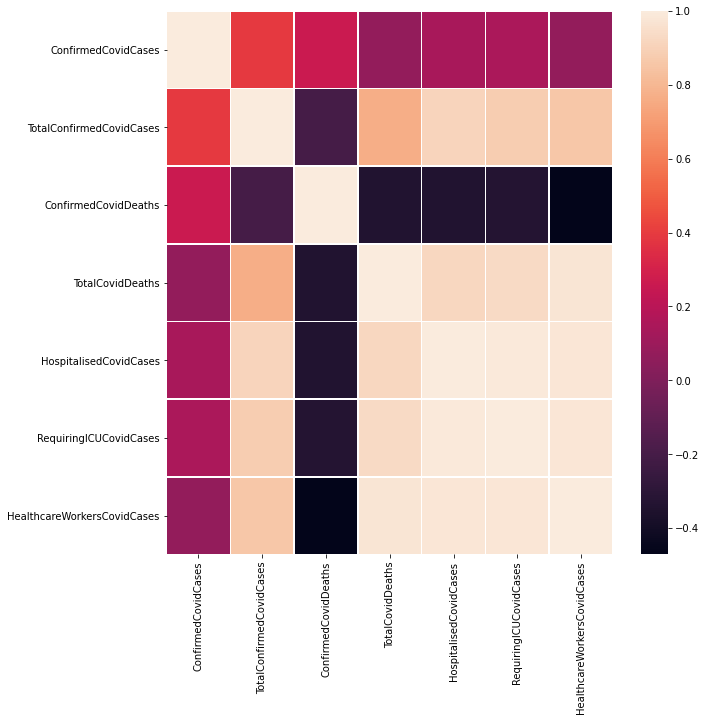

In [3]:
# correlation matrix
corr = df_raw.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, linewidth=0.5)
plt.show()

In [4]:
# total cases per day
df_total_cases = df_raw.copy()
df_total_cases = df_total_cases.dropna()
#df_total_cases = df_total_cases.fillna(0)
#df_total_cases = df_total_cases.fillna(df_total_cases.mean())

# normalise
#df_total_cases = (df_total_cases - df_total_cases.min()) / (df_total_cases.max() - df_total_cases.min())

# new cases per day
df_new_cases = pd.DataFrame()
df_new_cases['ConfirmedCovidCases'] = df_total_cases['ConfirmedCovidCases']
df_new_cases['HealthcareWorkersCovidCases'] = df_total_cases['HealthcareWorkersCovidCases'].diff()
df_new_cases['HospitalisedCovidCases'] = df_total_cases['HospitalisedCovidCases'].diff()
df_new_cases['RequiringICUCovidCases'] = df_total_cases['RequiringICUCovidCases'].diff()

df_total_cases = df_total_cases.drop(columns=['ConfirmedCovidCases', 'ConfirmedCovidDeaths', 'TotalCovidDeaths'])

# Plotting Total Cases

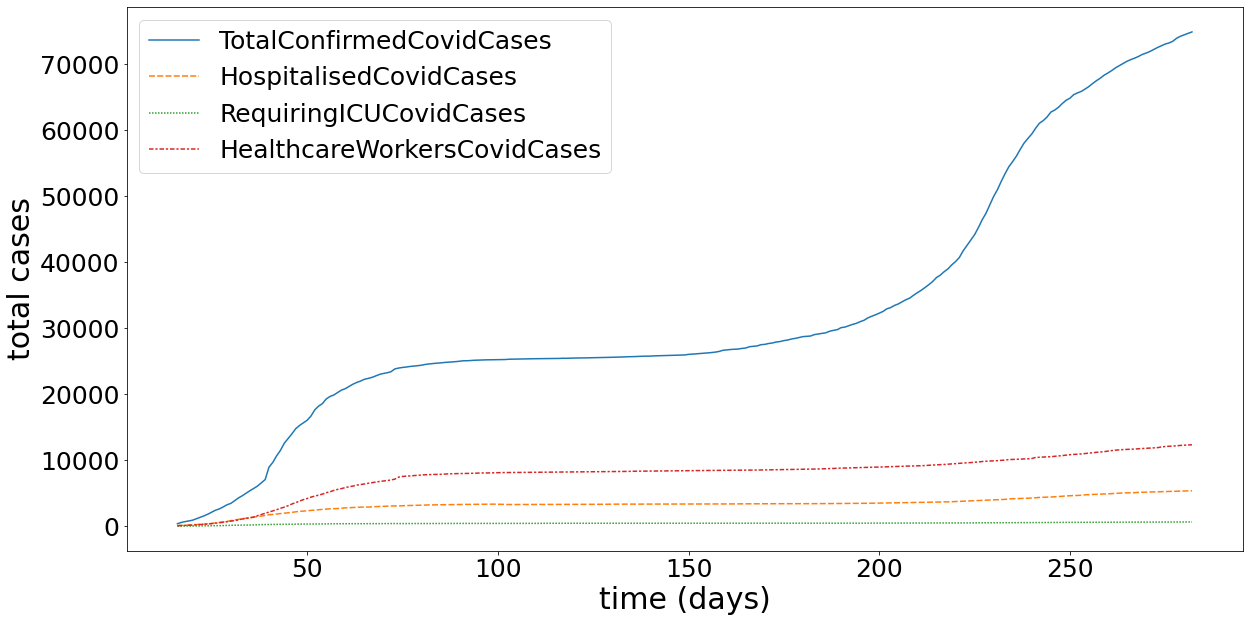

In [16]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_total_cases)
plt.legend(prop={'size': 25})
plt.xlabel('time (days)', fontsize=30)
plt.ylabel('total cases', fontsize=30)
plt.tick_params(labelsize=25)
plt.show()

# Plotting new cases

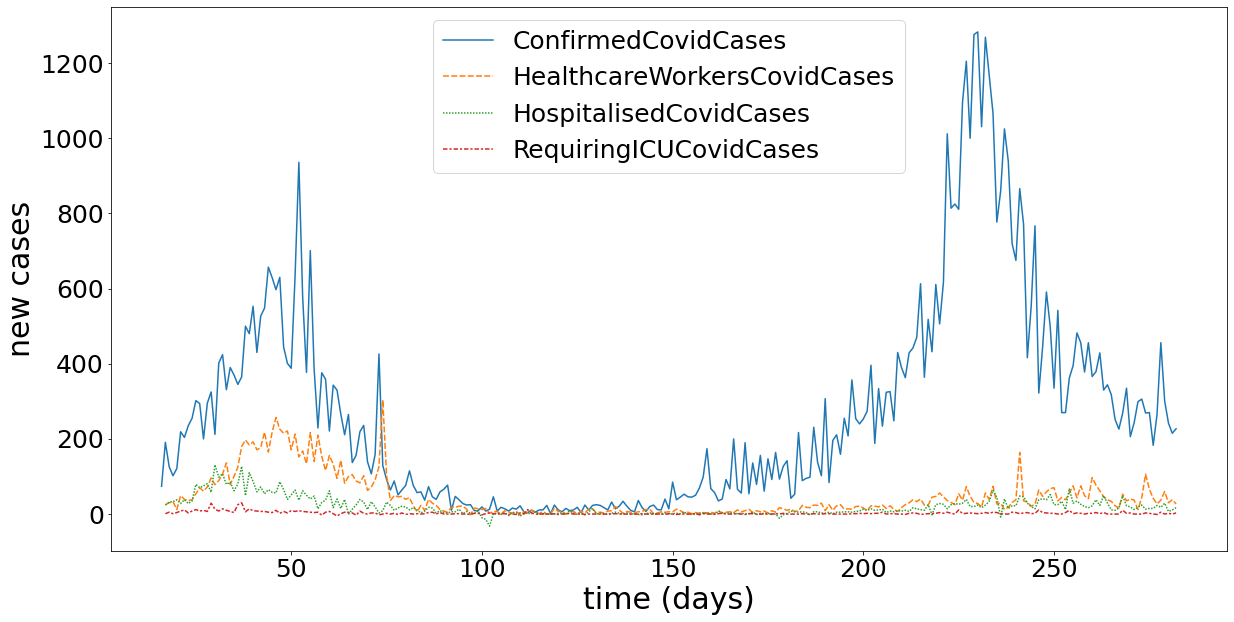

In [17]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(data=df_new_cases)
plt.legend(prop={'size': 25})
plt.xlabel('time (days)', fontsize=30)
plt.ylabel('new cases', fontsize=30)
plt.tick_params(labelsize=25)
plt.show()

In [ ]:
df_total_cases.to_csv('data/total_daily_cases.csv', index=False)
df_new_cases.to_csv('data/new_daily_cases.csv', index=False)